# Support Vector Machines

Support Vector Machine(SVM) is a powerful classifier that works both on linearly and nonlinearly separable data. SVM tries to find the “best” margin (distance between the line and the support vectors) that separates the classes. In this notebook we will demonstrate the use of our `SVM`, on different datasets, and using different kernels.

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%config InlineBackend.figure_formats = ['svg'] # Makes the plots svg (visually better)
from svm import main, SVM
from test_data import TestLinear, TestNonLinear
import numpy as np
import random

## The Primal Problem

The method we used to solve the primal soft-margin SVM problem is the Quadratic Penalty (QP) method. This method was chosen because it transforms the original constrained and non-smooth optimization problem into an unconstrained, smooth one, which is more suitable for gradient-based algorithms. This is implemented in `_fit_primal`.

In [4]:
# Generate dataset
w = np.array([1.0, 1.0])
b = 1.0
n_A = 200
n_B = 400
margin = 0.5

seed = random.randint(0,1000) #seed for the primal problems

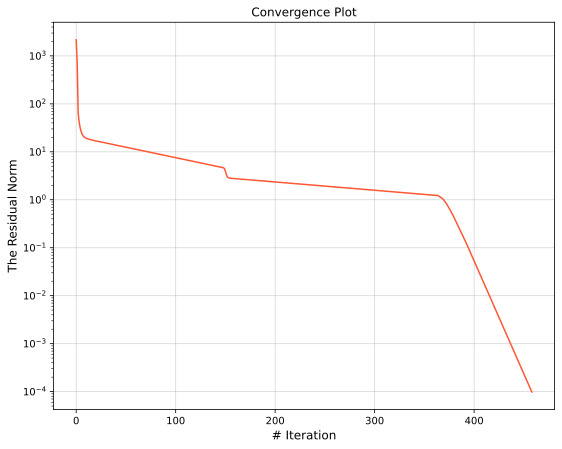

Training time: 0.4450 seconds


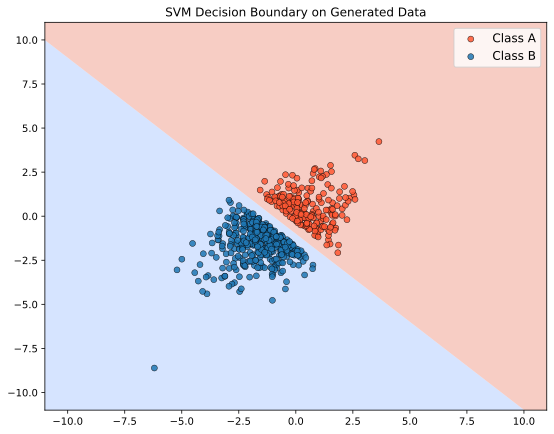

In [5]:
main(w, b, n_A, n_B, margin, "linear", "primal", TestLinear, seed)

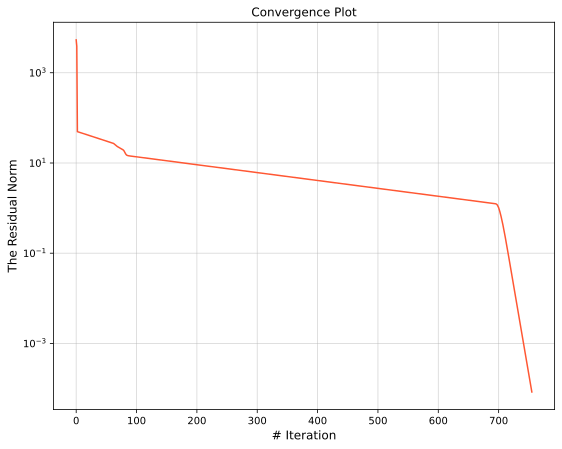

Training time: 0.1541 seconds


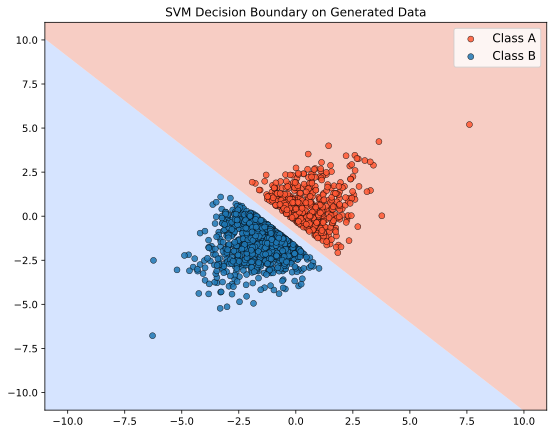

In [6]:
main(w, b, 500, 1000, margin, "linear", "primal", TestLinear, seed)

/Users/theaboge/Documents/GitHub/optimization_project/svm.py:93: RuntimeWarning: overflow encountered in multiply
  (2 * (1 - margin) * y * X.T * indicator), axis=1
/Users/theaboge/Documents/GitHub/optimization_project/svm.py:93: RuntimeWarning: invalid value encountered in multiply
  (2 * (1 - margin) * y * X.T * indicator), axis=1
/Users/theaboge/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


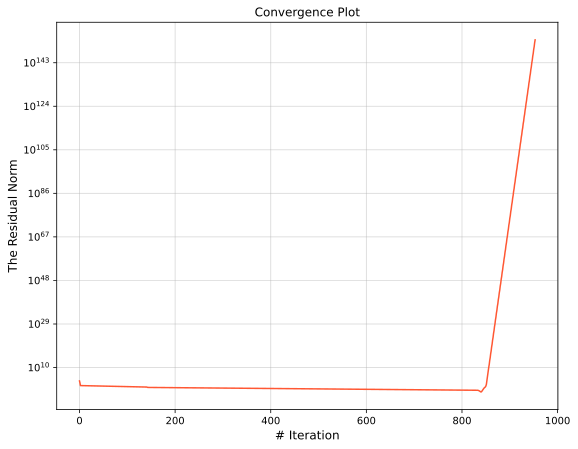

Training time: 1.1961 seconds


/Users/theaboge/Library/Python/3.9/lib/python/site-packages/matplotlib/contour.py:1454: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/Users/theaboge/Library/Python/3.9/lib/python/site-packages/matplotlib/contour.py:1455: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


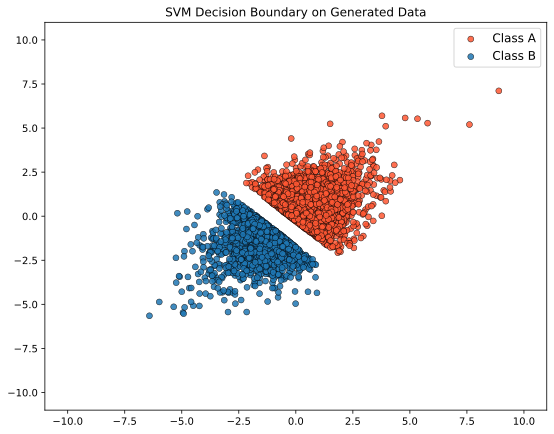

In [7]:
main(w, b, 3000, 2000, margin, "linear", "primal", TestLinear, seed)

We see that the Quadratic Penalty method works well for smaller dataset, but for larger datasets, e.g. $(3000,2000)$, the method doesn´t always converge.

## The Dual Problem

For the solution of the dual problem we are using a method based on a projected gradient descent. This is implemented in `_fit_dual`with helper functions in the `SVM`-class.

### The Linear Case

In [8]:
# Generate dataset
w = np.array([1.0, 1.0])
b = 1.0
n_A = 2000
n_B = 3000
margin = 0.5
seed = random.randint(0,1000)

Iteration: 0, Line search triggered
Converged after 278 iterations.


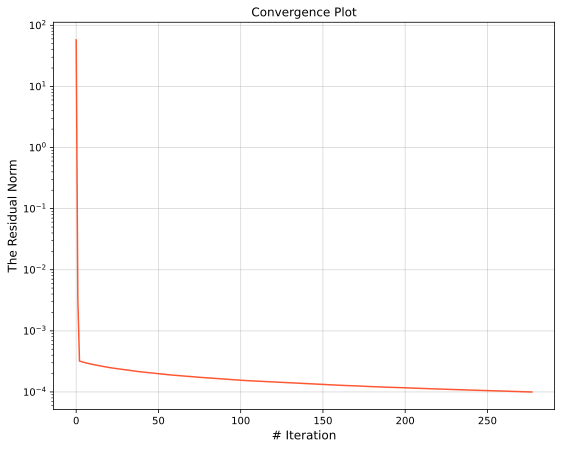

Training time: 20.3843 seconds


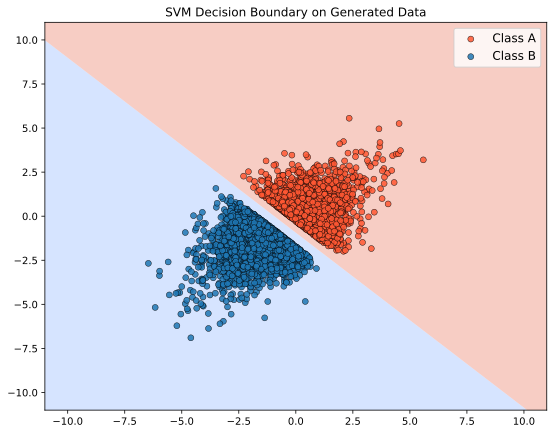

In [9]:
res = main(w, b, n_A, n_B, margin, "linear", "dual", TestLinear, seed)

### Gaussian Kernel

In [ ]:
# Generate dataset
w = np.array([1.0, 1.0])
b = 1.0
n_A = 5000
n_B = 4000
margin = 2.0

In [ ]:
main(w, b, n_A, n_B, margin, "gaussian", "dual", TestNonLinear, seed=561, sigma=0.2)

Iteration: 0, Line search triggered
Iteration: 558, Line search triggered


KeyboardInterrupt: 

In [ ]:
main(w, b, n_A, n_B, margin, "gaussian", "dual", TestNonLinear, seed=561, sigma=1.3)

In [ ]:
main(w, b, n_A, n_B, margin, "gaussian", "dual", TestNonLinear, seed=561, sigma=2.0)

### Laplacian Kernel

In [ ]:
# Generate dataset
w = np.array([1.0, 1.0])
b = 1.0
n_A = 200
n_B = 400
margin = 2.0

In [ ]:
main(w, b, n_A, n_B, margin, "laplacian", "dual", TestNonLinear, seed=323, sigma=0.5)

Iteration: 0, Line search triggered
Iteration: 348, Line search triggered
Converged after 386 iterations.


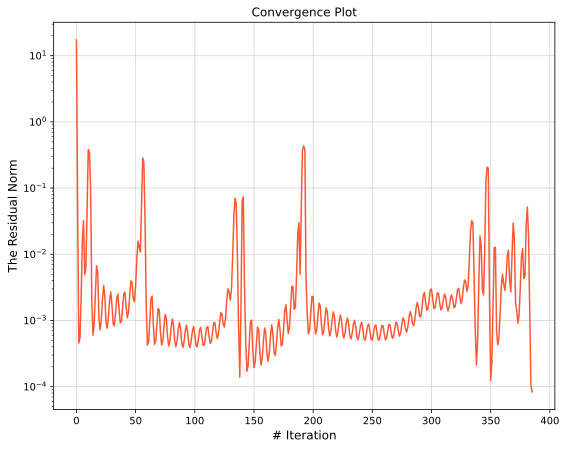

Training time: 0.1561 seconds


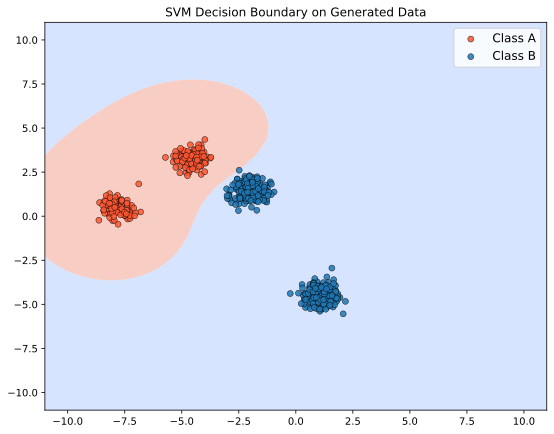

In [ ]:
main(w, b, n_A, n_B, margin, "laplacian", "dual", TestNonLinear, seed=323, sigma=1.0)

In [ ]:
main(w, b, n_A, n_B, margin, "laplacian", "dual", TestNonLinear, seed=323, sigma=2.0)

### Inverse Multiquadratic

In [ ]:
# Generate dataset
w = np.array([1.0, 1.0])
b = 1.0
n_A = 300
n_B = 400
margin = 2.0

Iteration: 0, Line search triggered
Iteration: 302, Line search triggered
Converged after 358 iterations.


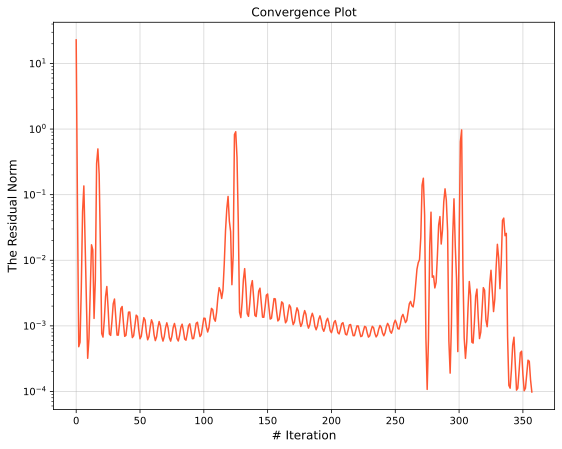

Training time: 0.1667 seconds


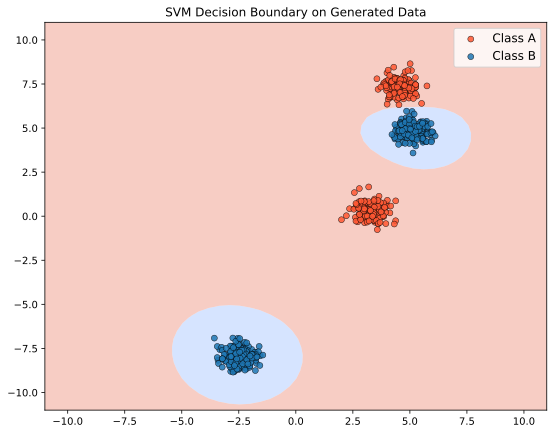

In [ ]:
main(w, b, n_A, n_B, margin, "laplacian", "dual", TestNonLinear, seed=323, sigma=0.1, s=1.0)

In [ ]:
main(w, b, n_A, n_B, margin, "laplacian", "dual", TestNonLinear, seed=323, sigma=0.5, s=1.0)

In [ ]:
main(w, b, n_A, n_B, margin, "laplacian", "dual", TestNonLinear, seed=323, sigma=1.0, s=1.0)

In [ ]:
main(w, b, n_A, n_B, margin, "laplacian", "dual", TestNonLinear, seed=323, sigma=0.1, s=0.5)

In [ ]:
main(w, b, n_A, n_B, margin, "laplacian", "dual", TestNonLinear, seed=323, sigma=0.5, s=0.5)

In [ ]:
main(w, b, n_A, n_B, margin, "laplacian", "dual", TestNonLinear, seed=323, sigma=1.0, s=0.5)

In [ ]:
main(w, b, n_A, n_B, margin, "laplacian", "dual", TestNonLinear, seed=323, sigma=0.1, s=3)

In [ ]:
main(w, b, n_A, n_B, margin, "laplacian", "dual", TestNonLinear, seed=323, sigma=0.5, s=3)

In [ ]:
main(w, b, n_A, n_B, margin, "laplacian", "dual", TestNonLinear, seed=323, sigma=1.0, s=3)

# Numerical Analysis

#### Convergence Rate:
The convergence rate of our dual SVM method, based on projected gradient descent, is theoretically sublinear for general convex problems, and linear if the dual problem is strongly convex (e.g., with a positive definite Gram matrix).
However, the incorporation of Barzilai-Borwein step sizes and exact line search accelerates convergence in practice, often exhibiting superlinear behavior in the early stages, consistent with findings in Dai & Fletcher (2006).

#### Performance:
The complexity of our dual SVM solver is $O(M^2)$ per iteration, primarily due to the Gram matrix-vector multiplications. The number of iterations depends on the problem's conditioning and convergence tolerance. In practice, the BB step size adaptation and exact line search significantly reduce iteration count. Compared to standard QP solvers, this approach demonstrates quicker computations for medium- to large-sized datasets.

#### Numerical Performance:
The method has numerical stability, maintaining feasibility through projections. The convergence is rapid in early iterations, but may slow down near the optimum. The line search prevents stalling in the wrong trajectory, eventually leading to convergence. We see that the line search is especically important for the non-linear kernels, as the trajectories fluctuates quite a lot, before eventually reaching the minima.